In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir('/content/drive/MyDrive/1017 RDS/project')

In [7]:
!ls

 1017_RDS_draft.pdf		 final_ppt.gslides
'1.1 EDA.ipynb'			 insurance.csv
'1.2 ADS Implementation.ipynb'	'project proposal.gdoc'
 Aif_Metric.ipynb		 prompt.gdoc
 cc_contribution.gdoc		 prompt.pdf
 Contributino_Document.gdoc


# Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load data

In [9]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# EDA - OG labels

## missing values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## distributions

In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Text(0.5, 0.98, 'Boxplots for Numerical Features')

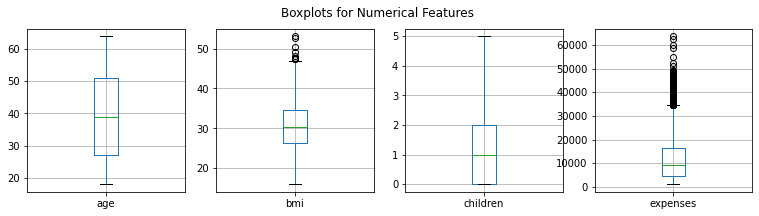

In [13]:
fig,axe = plt.subplots(1,4,figsize=[13,3])
df.boxplot(column=['age'], ax=axe[0])
df.boxplot(column=['bmi'], ax=axe[1])
df.boxplot(column=['children'], ax=axe[2])
df.boxplot(column=['expenses'], ax=axe[3])
fig.suptitle('Boxplots for Numerical Features')

Text(0.5, 1.1, 'Distribution for Numerical Features')

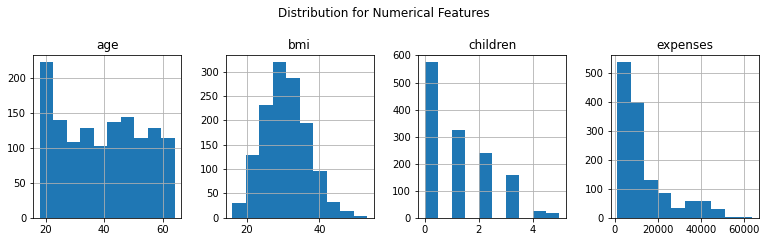

In [14]:
fig,axe = plt.subplots(1,4,figsize=[13,3])
df.hist(column=['age'], ax=axe[0])
df.hist(column=['bmi'], ax=axe[1])
df.hist(column=['children'], ax=axe[2])
df.hist(column=['expenses'], ax=axe[3])
fig.suptitle('Distribution for Numerical Features',y=1.1)
# fig.subplots_adjust(hspace=.5)

Text(0.5, 0.98, 'Distribution of Categorical Features')

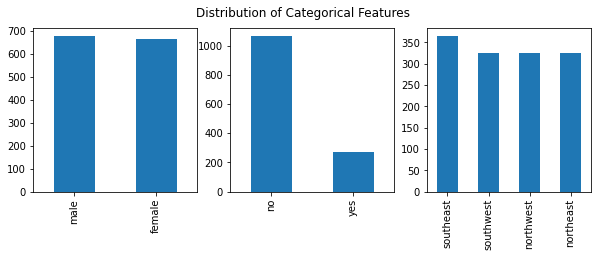

In [15]:
fig,axe = plt.subplots(1,3,figsize=[10,3])
df['sex'].value_counts().plot(kind='bar', ax=axe[0])
df['smoker'].value_counts().plot(kind='bar', ax=axe[1])
df['region'].value_counts().plot(kind='bar', ax=axe[2])
fig.suptitle('Distribution of Categorical Features')

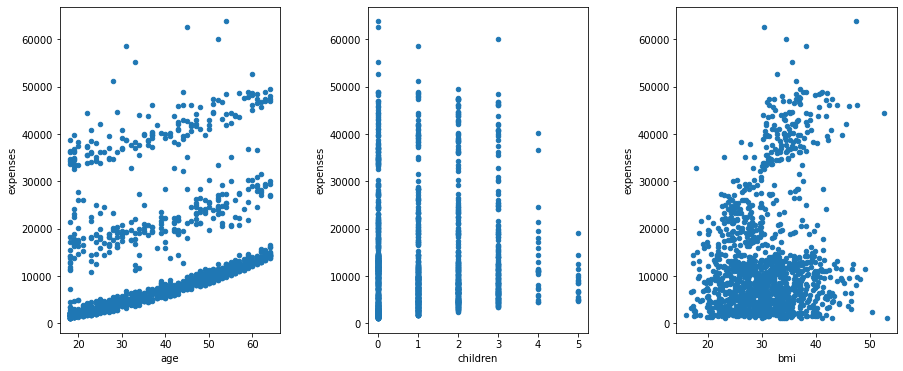

In [16]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df.plot(kind='scatter', x='age', y='expenses', ax=axes[0])
df.plot(kind='scatter', x='children', y='expenses', ax=axes[1])
df.plot(kind='scatter', x='bmi', y='expenses', ax=axes[2])

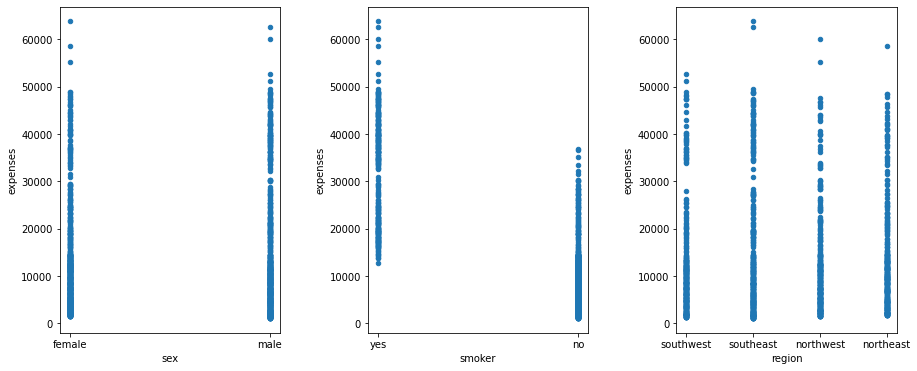

In [17]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df.plot(kind='scatter', x='sex', y='expenses', ax=axes[0])
df.plot(kind='scatter', x='smoker', y='expenses', ax=axes[1])
df.plot(kind='scatter', x='region', y='expenses', ax=axes[2])

## correlations

In [18]:
df_corr = df.corr()
df_corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


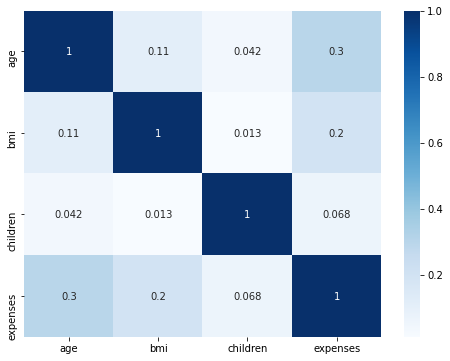

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot = True, cmap='Blues')

# EDA - Binary Lables

In [22]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


To make analysis easier, we have to define an interpretation for the given regression numerical results. Is a particular subgroup predicted to have higher expenses (which will lead to more insurance premium charged) than other subgroups? To define what consistitute higher, we calculated the mean and median of the expenses present in our data. We see that the mean is `13270.422414`, and the median is `9382.030000`. This suggest that we have some high expense outliers pulling our average. So to be fair and concise, we chose a somewhat middle point and define expenses that are higher than `10000` to be 1, and lower than `10000` to be 0.

In [23]:
df["exp_bin"] = np.where(df["expenses"] > 10000 , 1, 0)

In [24]:
df

,age,sex,bmi,children,smoker,region,expenses,exp_bin
0,19,female,27.9,0,yes,southwest,16884.92,1
1,18,male,33.8,1,no,southeast,1725.55,0
2,28,male,33.0,3,no,southeast,4449.46,0
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,0
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1
1334,18,female,31.9,0,no,northeast,2205.98,0
1335,18,female,36.9,0,no,southeast,1629.83,0
1336,21,female,25.8,0,no,southwest,2007.95,0


## distributions

In [25]:
df_high = df[df['exp_bin'] == 1]
df_low = df[df['exp_bin'] == 0]

Text(0.5, 1.1, 'Distribution for Numerical Features among >10000')

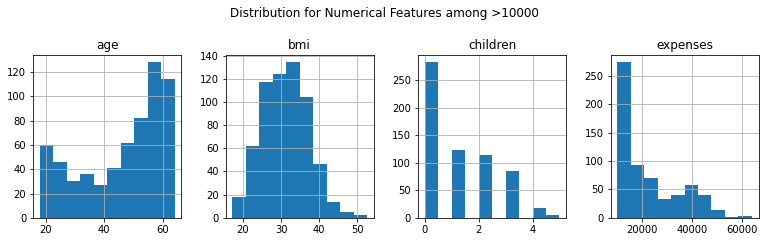

In [26]:
fig,axe = plt.subplots(1,4,figsize=[13,3])
df_high.hist(column=['age'], ax=axe[0])
df_high.hist(column=['bmi'], ax=axe[1])
df_high.hist(column=['children'], ax=axe[2])
df_high.hist(column=['expenses'], ax=axe[3])
fig.suptitle('Distribution for Numerical Features among >10000',y=1.1)
# fig.subplots_adjust(hspace=.5)

Text(0.5, 1.1, 'Distribution for Numerical Features among <10000')

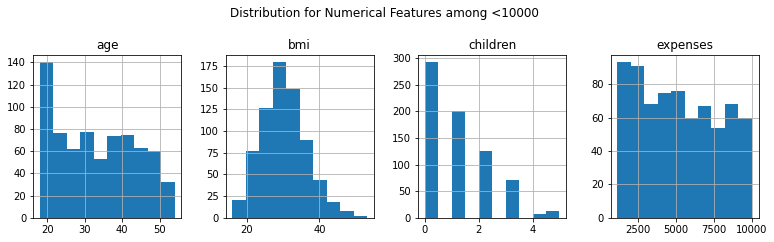

In [27]:
fig,axe = plt.subplots(1,4,figsize=[13,3])
df_low.hist(column=['age'], ax=axe[0])
df_low.hist(column=['bmi'], ax=axe[1])
df_low.hist(column=['children'], ax=axe[2])
df_low.hist(column=['expenses'], ax=axe[3])
fig.suptitle('Distribution for Numerical Features among <10000',y=1.1)
# fig.subplots_adjust(hspace=.5)

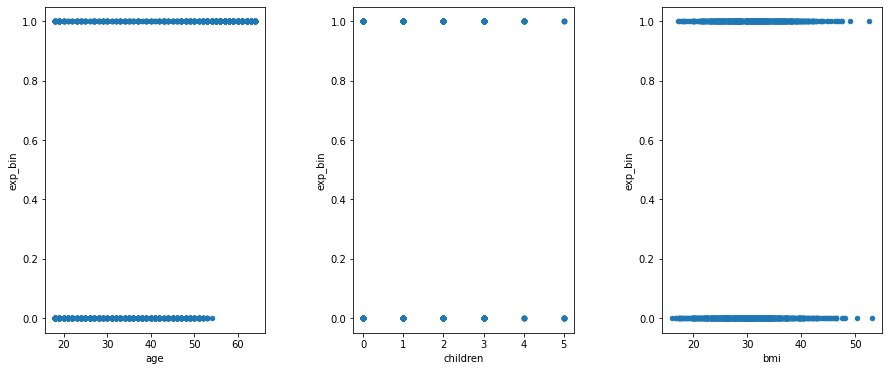

In [28]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df.plot(kind='scatter', x='age', y='exp_bin', ax=axes[0])
df.plot(kind='scatter', x='children', y='exp_bin', ax=axes[1])
df.plot(kind='scatter', x='bmi', y='exp_bin', ax=axes[2])

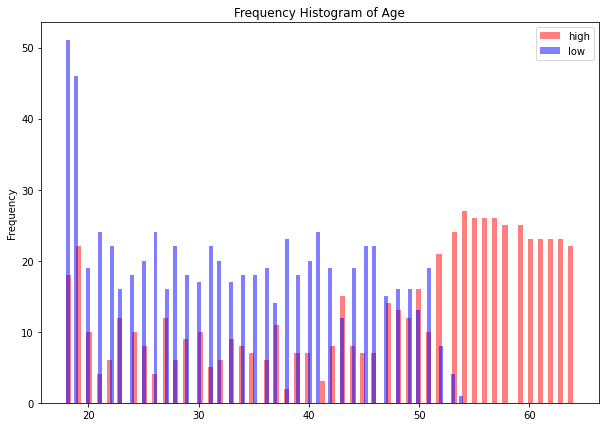

In [29]:
x1 = df.loc[df.exp_bin==1, 'age']
x2 = df.loc[df.exp_bin==0, 'age']


kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(10,7))
plt.hist(x1, **kwargs, color='r', label='high')
plt.hist(x2, **kwargs, color='b', label='low')
plt.gca().set(title='Frequency Histogram of Age', ylabel='Frequency')
plt.legend();

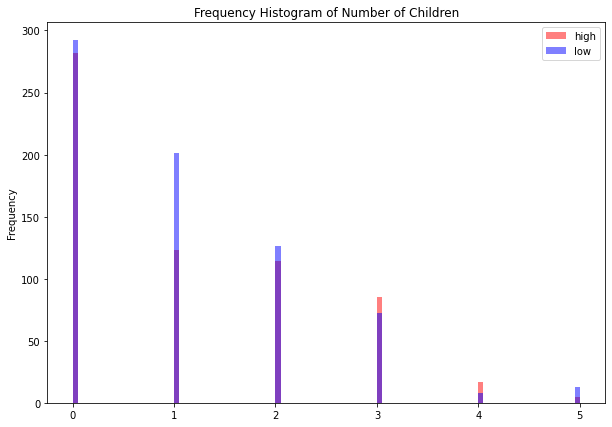

In [30]:
x1 = df.loc[df.exp_bin==1, 'children']
x2 = df.loc[df.exp_bin==0, 'children']


kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(10,7))
plt.hist(x1, **kwargs, color='r', label='high')
plt.hist(x2, **kwargs, color='b', label='low')
plt.gca().set(title='Frequency Histogram of Number of Children', ylabel='Frequency')
plt.legend();

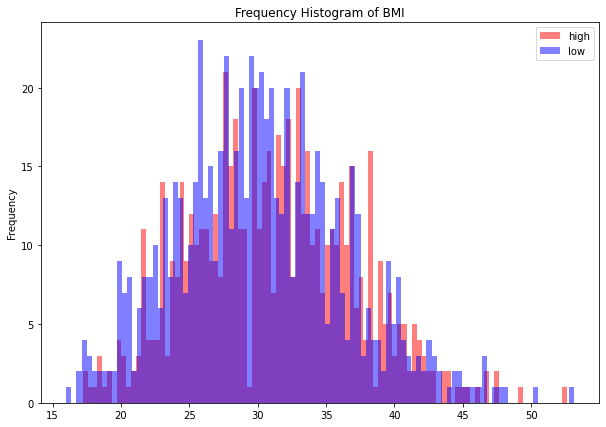

In [31]:
x1 = df.loc[df.exp_bin==1, 'bmi']
x2 = df.loc[df.exp_bin==0, 'bmi']


kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(10,7))
plt.hist(x1, **kwargs, color='r', label='high')
plt.hist(x2, **kwargs, color='b', label='low')
plt.gca().set(title='Frequency Histogram of BMI', ylabel='Frequency')
plt.legend();

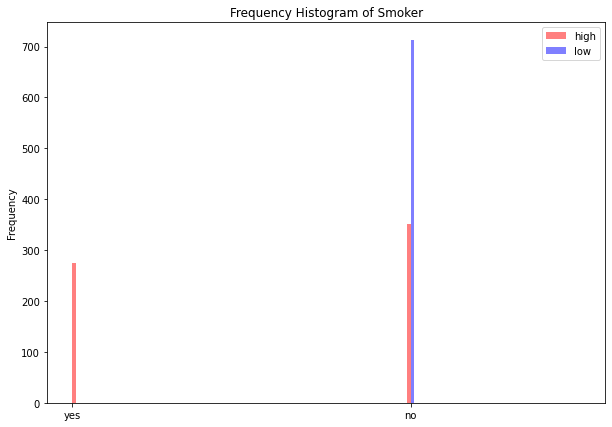

In [32]:
x1 = df.loc[df.exp_bin==1, 'smoker']
x2 = df.loc[df.exp_bin==0, 'smoker']


kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(10,7))
plt.hist(x1, **kwargs, color='r', label='high')
plt.hist(x2, **kwargs, color='b', label='low')
plt.gca().set(title='Frequency Histogram of Smoker', ylabel='Frequency')
plt.legend();

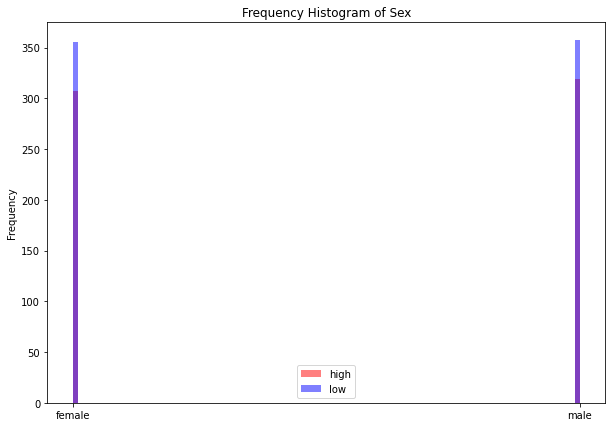

In [33]:
x1 = df.loc[df.exp_bin==1, 'sex']
x2 = df.loc[df.exp_bin==0, 'sex']


kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(10,7))
plt.hist(x1, **kwargs, color='r', label='high')
plt.hist(x2, **kwargs, color='b', label='low')
plt.gca().set(title='Frequency Histogram of Sex', ylabel='Frequency')
plt.legend();

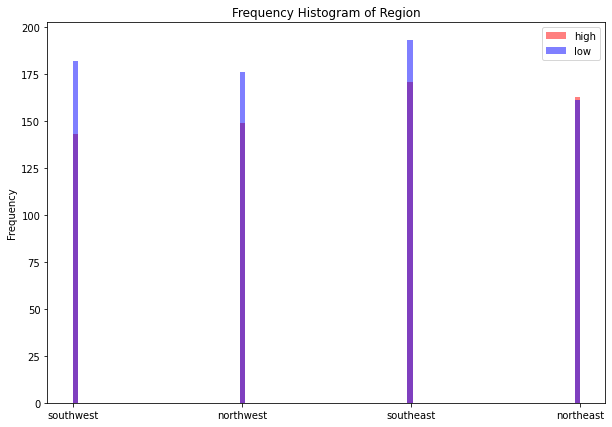

In [34]:
x1 = df.loc[df.exp_bin==1, 'region']
x2 = df.loc[df.exp_bin==0, 'region']


kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(10,7))
plt.hist(x1, **kwargs, color='r', label='high')
plt.hist(x2, **kwargs, color='b', label='low')
plt.gca().set(title='Frequency Histogram of Region', ylabel='Frequency')
plt.legend();

## correlations

In [35]:
df_corr = df.corr()
df_corr

,age,bmi,children,expenses,exp_bin
age,1.000000,0.109341,0.042469,0.299008,0.464396
bmi,0.109341,1.000000,0.012645,0.198576,0.070547
children,0.042469,0.012645,1.000000,0.067998,0.016882
expenses,0.299008,0.198576,0.067998,1.000000,0.710358
exp_bin,0.464396,0.070547,0.016882,0.710358,1.000000


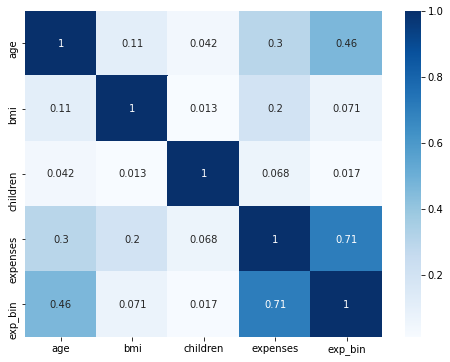

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot = True, cmap='Blues')